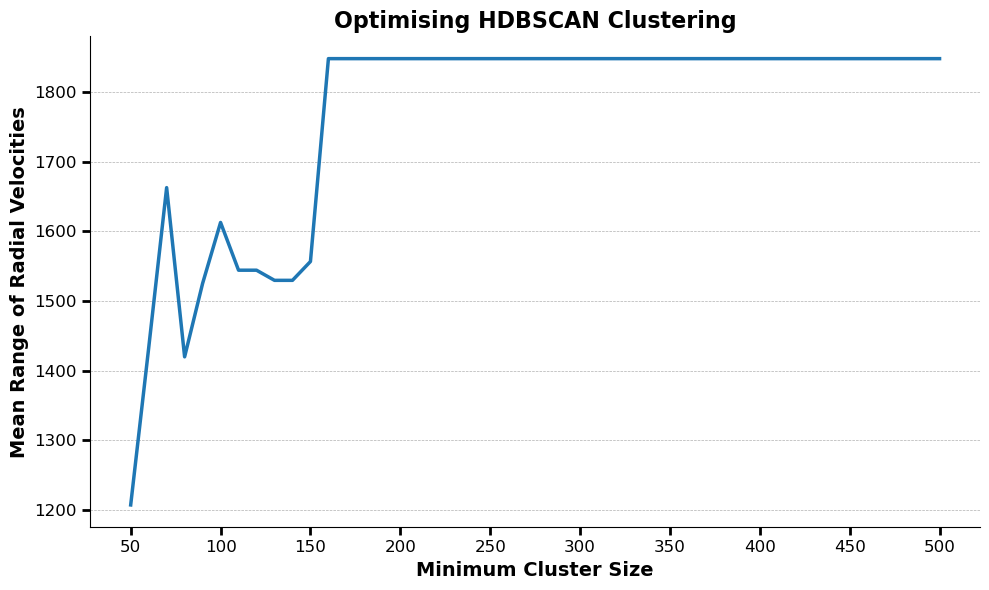

Optimal min_cluster_size: 50
Average range of radial velocities across clusters: 1206.94


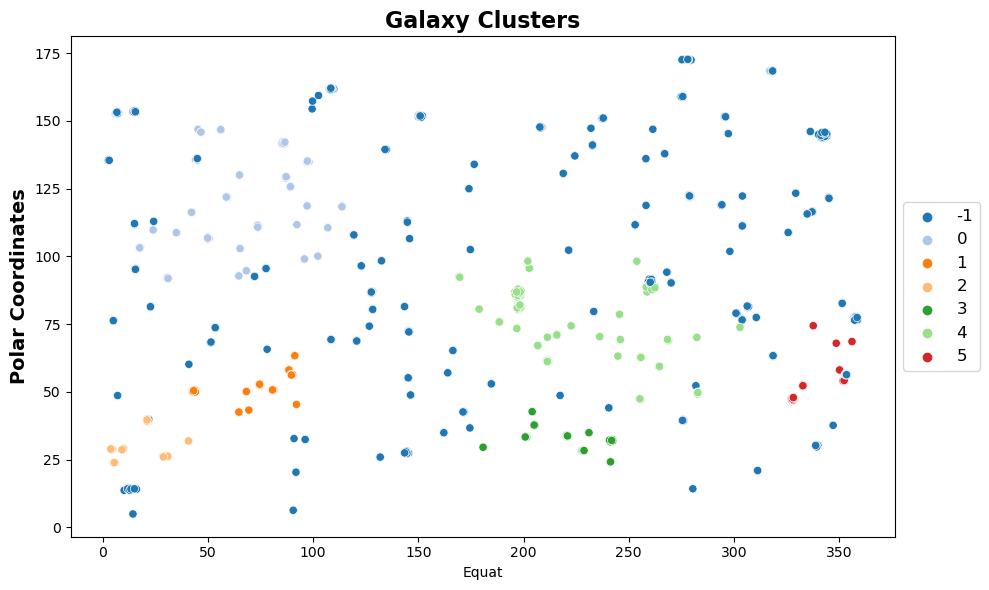

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


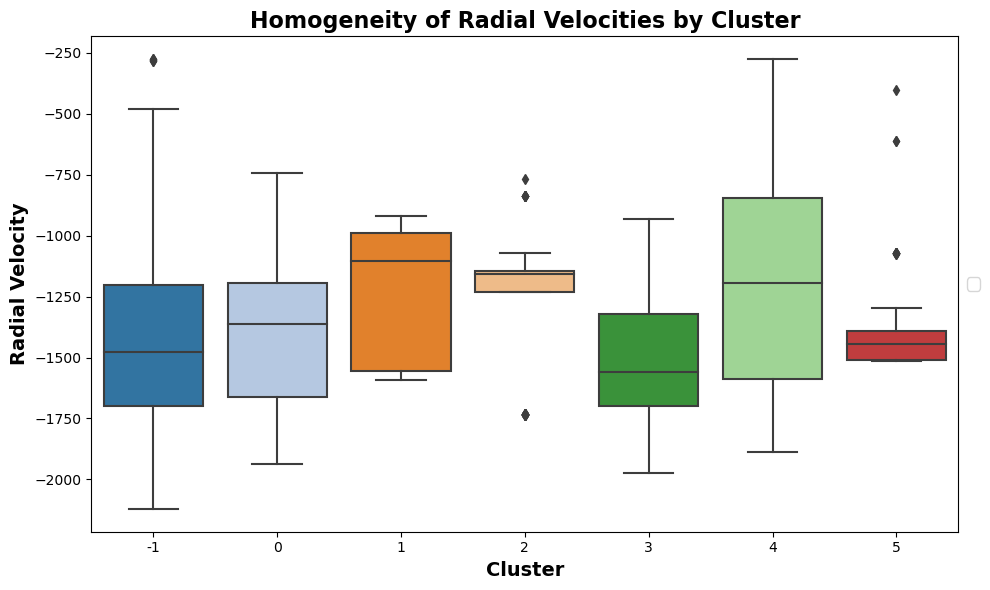

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import hdbscan
from scipy.stats import variation

# import and read data
galaxies = '/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Distant_Galaxy_Data.csv'
df = pd.read_csv(galaxies)

# use Equatorial and Polar coordinates for clustering
X = df[['Equat', 'Polar']]

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define function to evaluate clustering quality based on radial velocity ranges
def evaluate_clustering(X_scaled, data, min_cluster_size):
    # perform clustering
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusters = clusterer.fit_predict(X_scaled)

    # calculate range of radial velocities for each cluster
    radial_vel_ranges = []
    for label in np.unique(clusters):
        cluster_data = data[clusters == label]
        radial_vel_range = cluster_data['RadialVelocity'].max() - cluster_data['RadialVelocity'].min()
        radial_vel_ranges.append(radial_vel_range)

    # calculate mean range across clusters
    mean_range = np.mean(radial_vel_ranges)

    # return mean range
    return mean_range

# set range of values for min_cluster_size to try
min_cluster_sizes = range(50, 501, 10)

# initialize array to store mean ranges for each min_cluster_size value
mean_ranges = np.zeros(len(min_cluster_sizes))

# loop over each value of min_cluster_size and evaluate clustering quality
for i, min_cluster_size in enumerate(min_cluster_sizes):
    mean_range = evaluate_clustering(X_scaled, df, min_cluster_size)
    mean_ranges[i] = mean_range

# plot results
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(min_cluster_sizes, mean_ranges, linewidth=2.5, color='tab:blue')

# customize plot appearance
ax.set_xlabel('Minimum Cluster Size', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean Range of Radial Velocities', fontsize=14, fontweight='bold')
ax.set_title('Optimising HDBSCAN Clustering', fontsize=16, fontweight='bold')

# set x-axis tick formatting
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# set spines and ticks style
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', length=6, width=2, labelsize=12)

# add grid lines
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# choose optimal value for min_cluster_size based on results
optimal_min_cluster_size = min_cluster_sizes[np.argmin(mean_ranges)]
print(f"Optimal min_cluster_size: {optimal_min_cluster_size}")

# perform clustering with optimal min_cluster_size
clusterer = hdbscan.HDBSCAN(min_cluster_size=optimal_min_cluster_size)
clusters = clusterer.fit_predict(X_scaled)

# make cluster column and sort galaxies into their clusters
df['cluster'] = clusters

# calculate range of radial velocities for each cluster
radial_vel_ranges = []
for label in np.unique(clusters):
    cluster_data = df[clusters == label]
    radial_vel_range = cluster_data['RadialVelocity'].max() - cluster_data['RadialVelocity'].min()
    radial_vel_ranges.append(radial_vel_range)

# print average range of radial velocities across clusters
print(f"Average range of radial velocities across clusters: {np.mean(radial_vel_ranges)}")


fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Equat', y='Polar', hue='cluster', palette='tab20')

ax.set_ylabel('Polar Coordinates', fontsize=14, fontweight='bold')
ax.set_title('Galaxy Clusters', fontsize=16, fontweight='bold')


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='RadialVelocity', palette='tab20')

ax.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Radial Velocity', fontsize=14, fontweight='bold')
ax.set_title('Homogeneity of Radial Velocities by Cluster', fontsize=16, fontweight='bold')


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

In [25]:
# add cluster labels to dataframe
df['ClusterLabel'] = clusters

# save to new csv file
clustered_galaxies = '/Users/kobibrown/Desktop/Distance_Ladder_Project/Clustered_Distant_Galaxy_Data.csv'
df.to_csv(clustered_galaxies, index=False)
